# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the productc
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel("Y:/_online_retail/online retail.xlsx")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

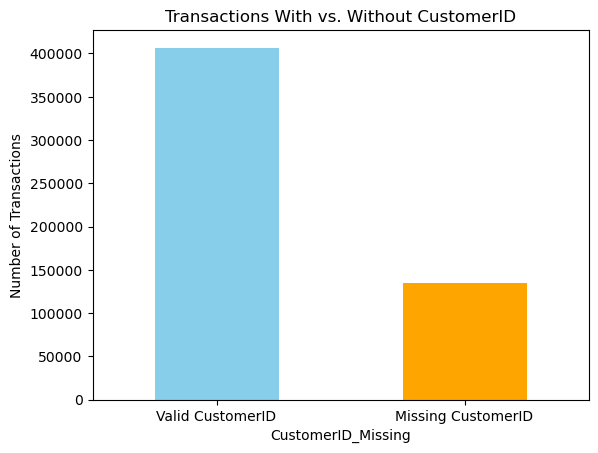

In [16]:
import matplotlib.pyplot as plt
df['CustomerID_Missing']=df['CustomerID'].isna()
# Plot the number of transactions with and without CustomerID
df['CustomerID_Missing'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Transactions With vs. Without CustomerID')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Valid CustomerID', 'Missing CustomerID'], rotation=0)
plt.show()


In [17]:
missing_customer_data = df[df['CustomerID'].isna()]

# Check the proportion of missing CustomerID for each country
missing_by_country = missing_customer_data['Country'].value_counts(normalize=True)
print("\nProportion of Missing CustomerID by Country:")
print(missing_by_country)


Proportion of Missing CustomerID by Country:
Country
United Kingdom    0.989044
EIRE              0.005264
Hong Kong         0.002132
Unspecified       0.001495
Switzerland       0.000925
France            0.000489
Israel            0.000348
Portugal          0.000289
Bahrain           0.000015
Name: proportion, dtype: float64


In [18]:

df['Description'] = df['Description'].fillna('Unknown')

# Fill missing CustomerID with a placeholder (-1)
df['CustomerID'] = df['CustomerID'].fillna(-1)

# Optionally create a flag for missing CustomerID
df['CustomerID_Missing'] = df['CustomerID'].isnull()

# Check the dataset after handling missing values
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               0
CustomerID_Missing    0
dtype: int64


In [20]:
data_cleaned = df.dropna()

In [21]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

In [22]:
data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Missing
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False


In [23]:
print("\nData Summary:")
print(data_cleaned.describe())


Data Summary:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  541909.000000  
mean    11476.725404  
min        -1.000000  
25%     12352.000000  
50%     14382.000000  
75%     16255.000000  
max     18287.000000  
std      6778.330409  


In [24]:
top_products = (
    data_cleaned.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("\nTop 5 Selling Products:")
print(top_products)


Top 5 Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53847
JUMBO BAG RED RETROSPOT              47363
ASSORTED COLOUR BIRD ORNAMENT        36381
POPCORN HOLDER                       36334
PACK OF 72 RETROSPOT CAKE CASES      36039
Name: Quantity, dtype: int64


In [25]:
data_cleaned['TotalSales'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
sales_by_country = (
    data_cleaned.groupby('Country')['TotalSales']
    .sum()
    .sort_values(ascending=False)
)
print("\nTotal Sales by Country:")
print(sales_by_country)


Total Sales by Country:
Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666

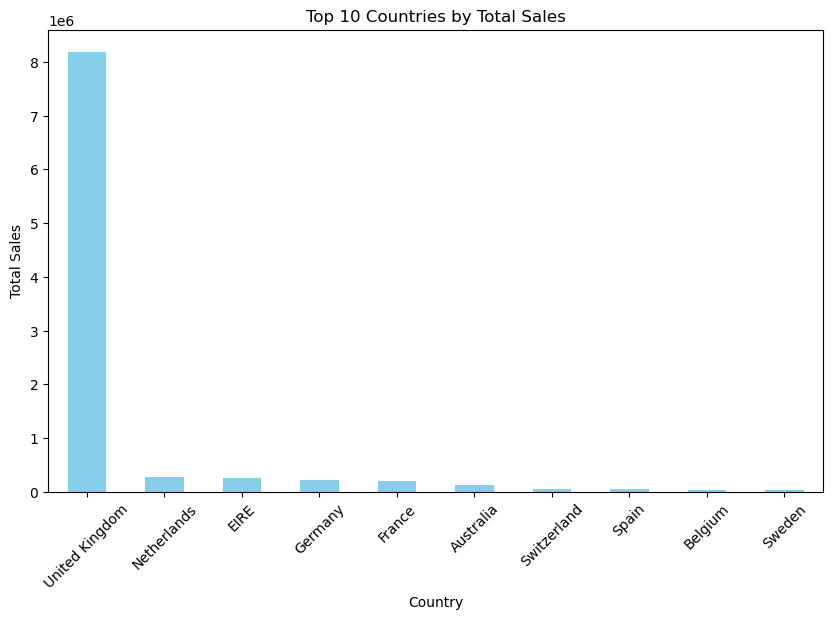

In [26]:
import matplotlib.pyplot as plt

# Plotting the top 10 countries by sales
top_countries = sales_by_country.head(10)
top_countries.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Countries by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Online Retail Data Analysis

## Project Overview
This project involves analyzing the Online Retail Dataset, which contains transactional data from an online retail store spanning 2010–2011. The goal is to explore the dataset, clean missing data, and generate insights about sales, customers, and products.

## Dataset Description
The dataset, Online Retail.xlsx, includes the following columns:
- **InvoiceNo**: Invoice number of the transaction.
- **StockCode**: Unique product code.
- **Description**: Description of the product.
- **Quantity**: Quantity of the product in the transaction.
- **InvoiceDate**: Date and time of the transaction.
- **UnitPrice**: Price per unit of the product.
- **CustomerID**: Unique identifier for each customer.
- **Country**: Country where the transaction occurred.

Download the dataset from here if working locally.

## Project Features

### Data Cleaning:
- Handling missing values for Description and CustomerID.
- Exploring patterns in missing data.

### Exploratory Data Analysis (EDA):
- Identify top-selling products.
- Analyze sales by country.
- Understand customer behavior.

### Visualization:
- Bar charts for top-performing products and countries.
- Distribution of transactions with missing CustomerID.

### Flexible Analysis:
- Support for analyzing data with and without missing CustomerID.

## Requirements
Make sure you have the following Python libraries installed:
- pandas
- numpy
- matplotlib
- openpyxl (for reading .xlsx files)

You can install these dependencies with:
!pip install pandas numpy matplotlib openpyxl
